In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

reg1 

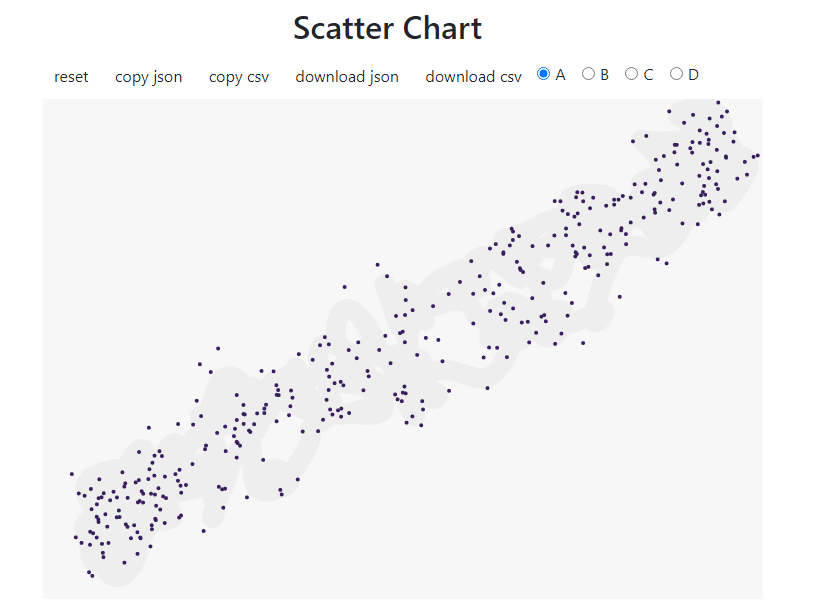


reg2 

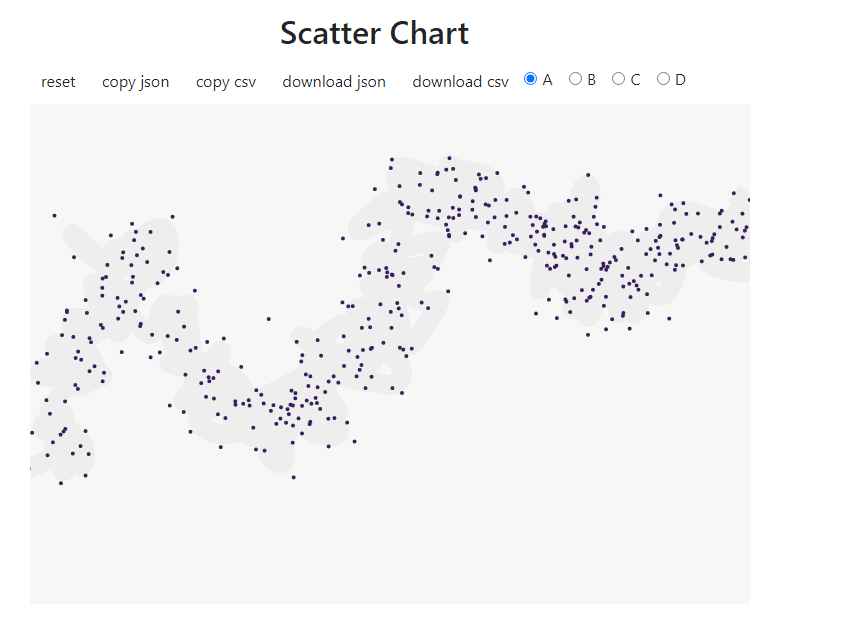


reg3 

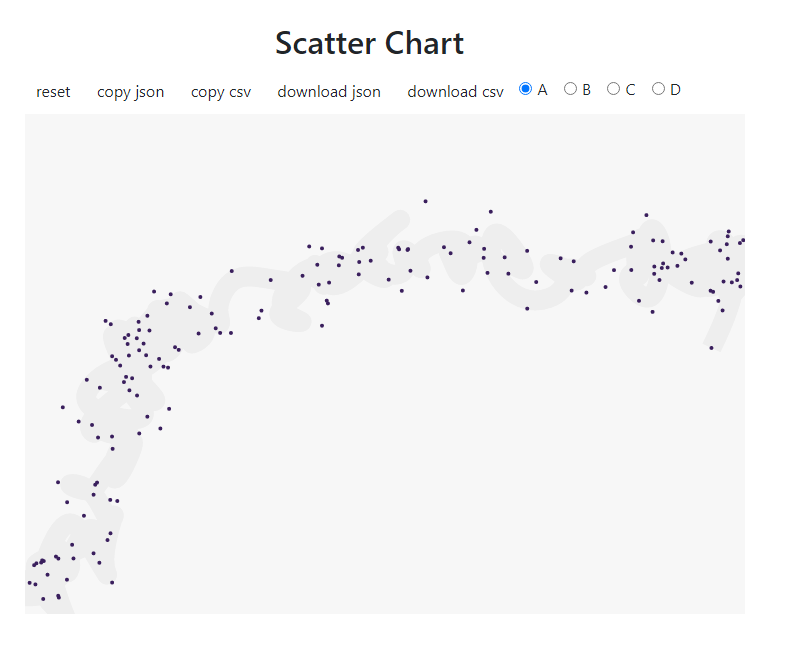


In [17]:
def train_linear_regression(X_train, y_train):
    # Entrenar modelo de regresión lineal
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model

def train_knn_regressor(X_train, y_train):
    # Entrenar modelo de KNN para regresión
    knn_model = KNeighborsRegressor(n_neighbors=20)
    knn_model.fit(X_train, y_train)
    return knn_model

def train_random_forest_regressor(X_train, y_train):
    rf_model = RandomForestRegressor(n_estimators=20, random_state=42, max_depth=3)
    rf_model.fit(X_train, y_train)
    return rf_model

def train_xgboost_regressor(X_train, y_train):
    # Entrenar modelo de XGBoost para regresión
    xgb_model = xgb.XGBRegressor(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=0, alpha=0.5)
    xgb_model.fit(X_train, y_train)
    return xgb_model

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    # Calcular el R^2 en el conjunto de entrenamiento
    train_r2 = model.score(X_train, y_train)

    # Realizar predicciones en los datos de prueba y calcular el R^2 y el MSE
    y_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return train_r2, test_r2, mse

def plot_residuals(y_test, y_pred, model_name):
    # Graficar residuos para un modelo dado
    residuals = y_test - y_pred
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel("True values")
    plt.ylabel("Residuals")
    plt.title("Residuals plot - " + model_name)
    plt.show()


def plot_predictions_vs_true(y_true, y_pred, model_name):
    # Graficar predicciones vs valores reales para un modelo dado
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title("Predictions vs True values - " + model_name)
    plt.show()


def plot_feature_vs_predictions_and_true(X_test, y_true, y_pred, model_name):
    # Graficar variable independiente vs predicciones y valores reales, diferenciados por color
    plt.figure(figsize=(5,5))
    plt.scatter(X_test, y_true, label="True values", color='blue', alpha=0.5)
    plt.scatter(X_test, y_pred, label="Predicted values", color='red', alpha=0.5)
    plt.xlabel("Independent variable (x)")
    plt.ylabel("Dependent variable (y)")
    plt.title("Independent variable vs Predictions and True values - " + model_name)
    plt.legend()
    plt.show()

    
def split_data(X, y, test_size=0.2, random_state=42):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [5]:
# Leer los conjuntos de datos
df1 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg1.csv', index_col=0)
df2 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg2.csv', index_col=0)
df3 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg3.csv', index_col=0)


In [12]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()




Dataset 1:

Model: Linear Regression
Train R^2: 0.9154
Test R^2: 0.9178
MSE: 1362.1000


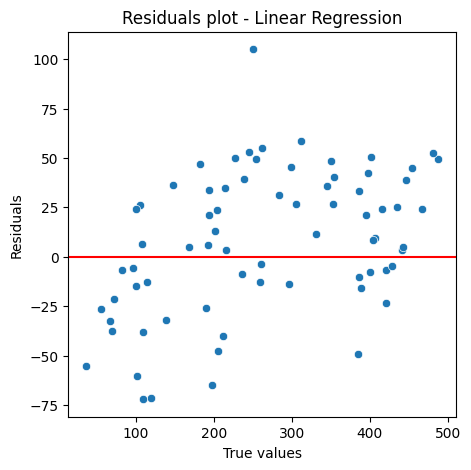

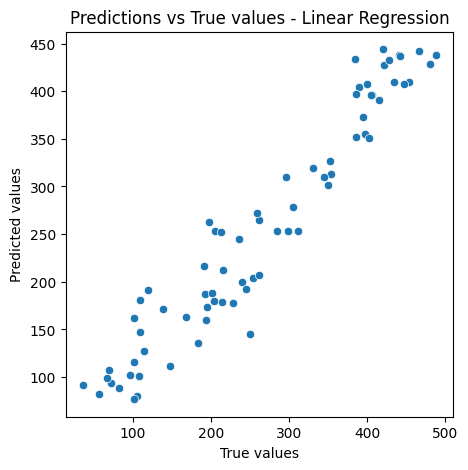

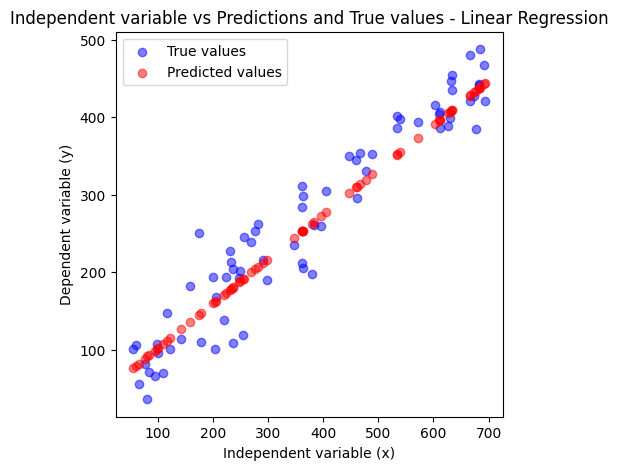


Model: KNN Regressor
Train R^2: 0.9216
Test R^2: 0.9175
MSE: 1366.7124


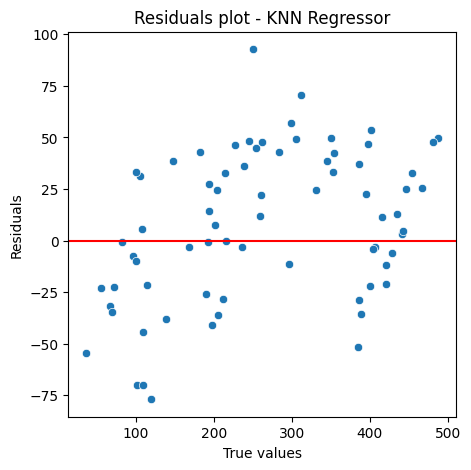

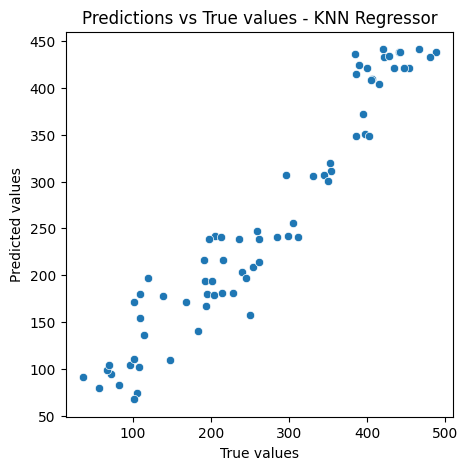

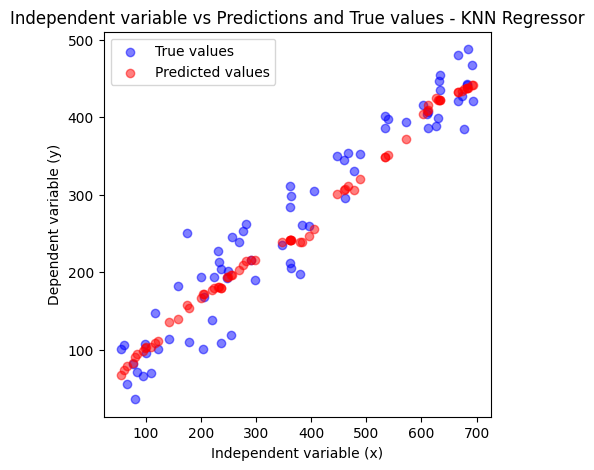


Model: Random Forest Regressor
Train R^2: 0.9269
Test R^2: 0.9087
MSE: 1511.6224


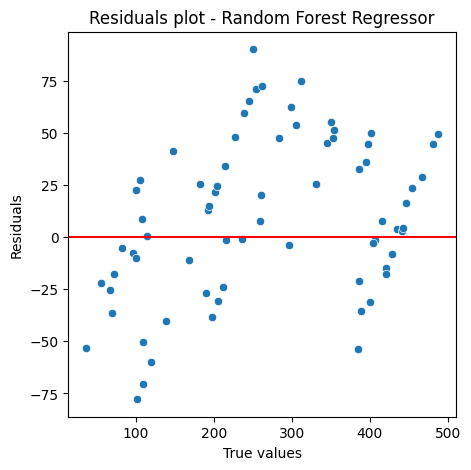

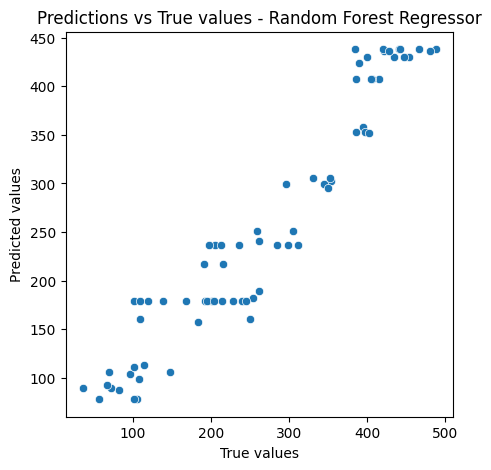

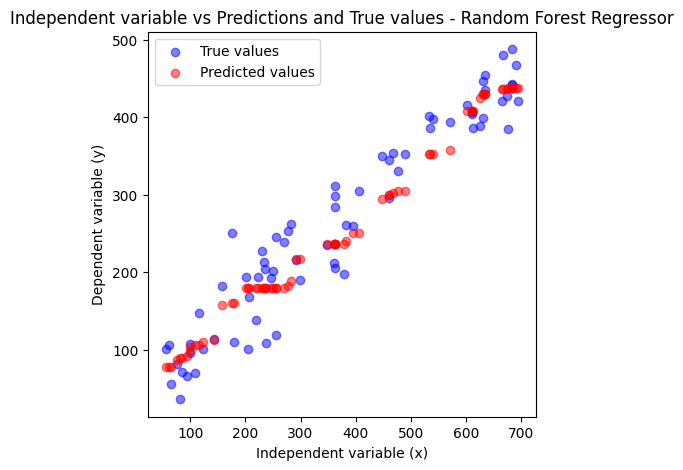


Model: XGBoost Regressor
Train R^2: 0.8533
Test R^2: 0.7907
MSE: 3466.7520


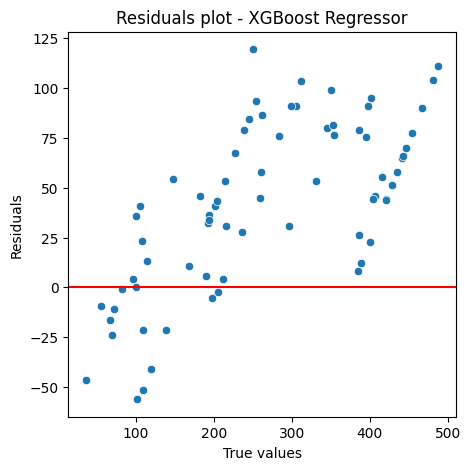

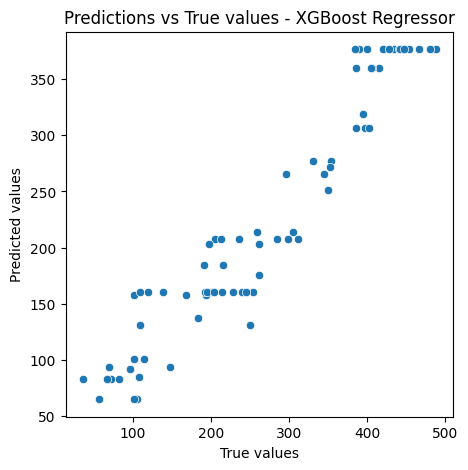

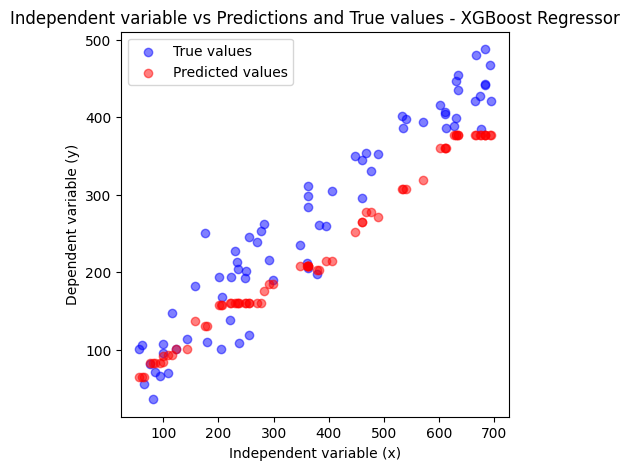



Dataset 2:

Model: Linear Regression
Train R^2: 0.3498
Test R^2: 0.3581
MSE: 3178.9639


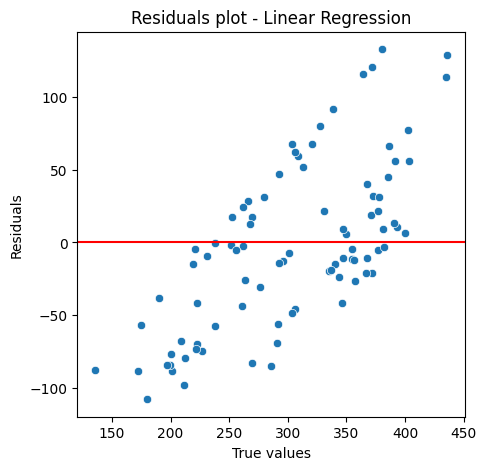

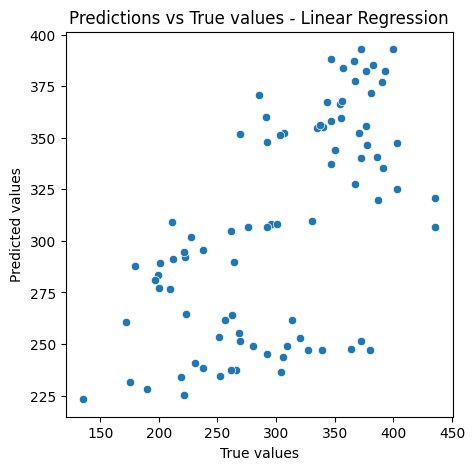

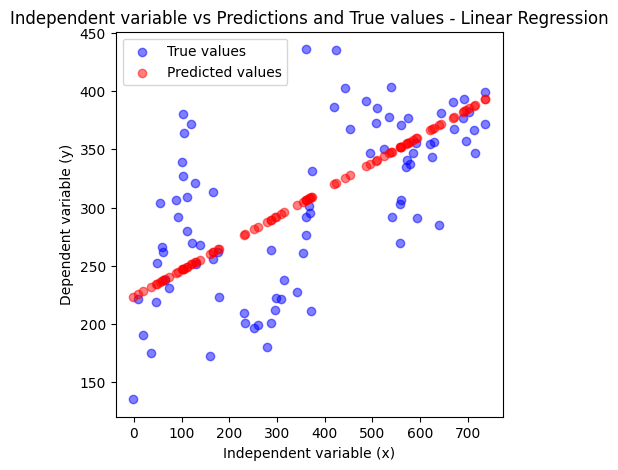


Model: KNN Regressor
Train R^2: 0.7180
Test R^2: 0.6690
MSE: 1639.4880


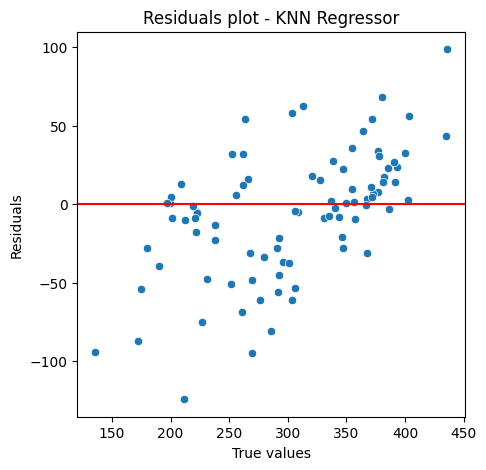

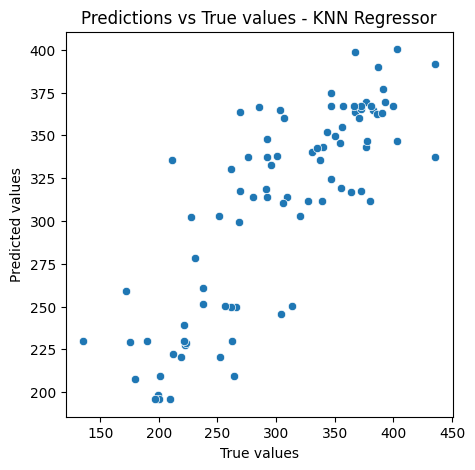

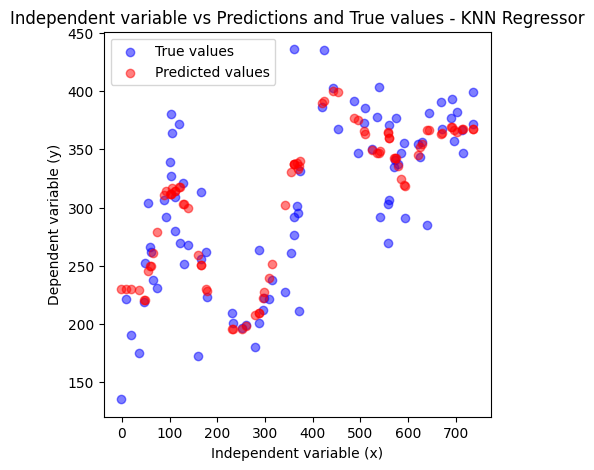


Model: Random Forest Regressor
Train R^2: 0.7350
Test R^2: 0.6409
MSE: 1778.5034


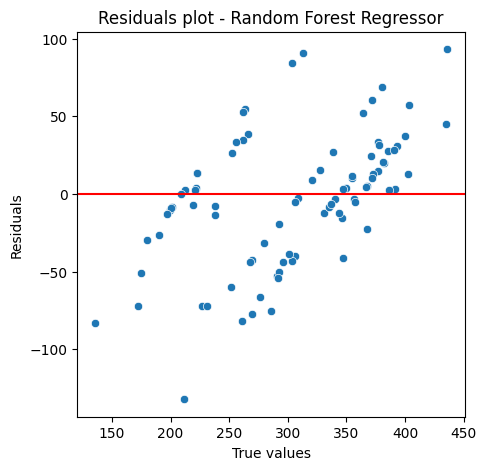

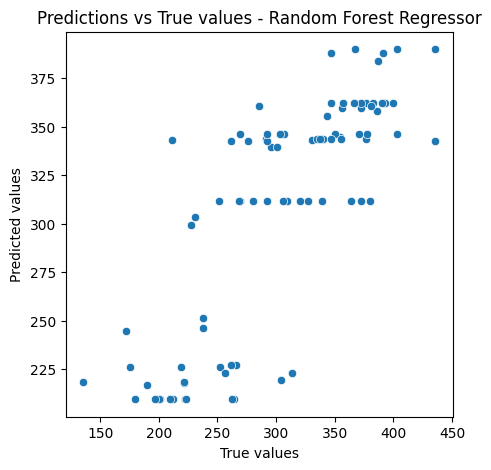

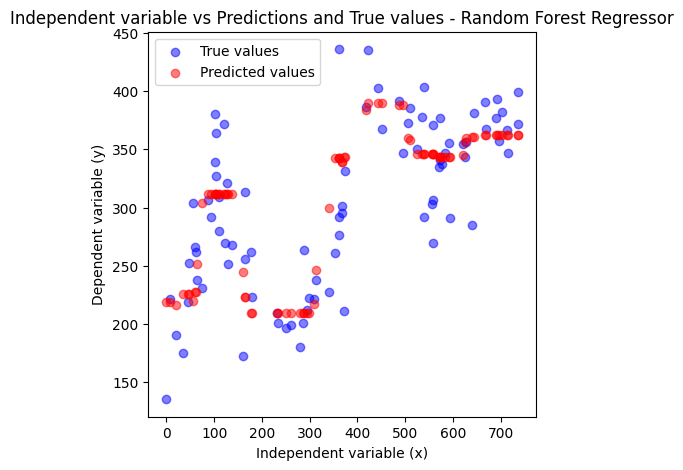


Model: XGBoost Regressor
Train R^2: 0.4715
Test R^2: 0.4014
MSE: 2964.3835


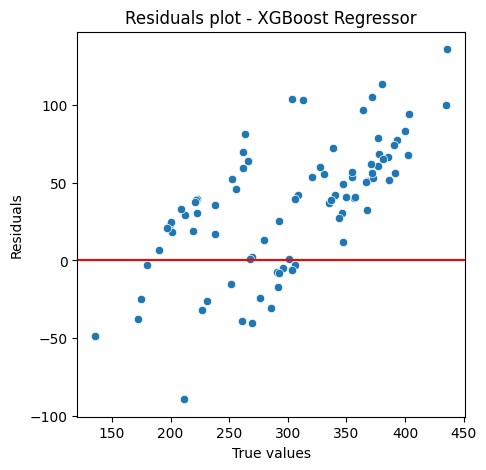

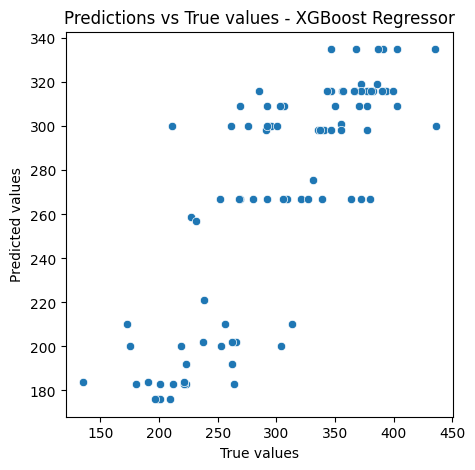

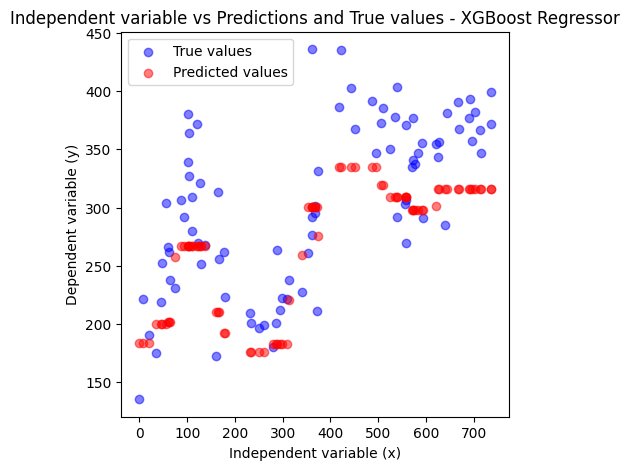



Dataset 3:

Model: Linear Regression
Train R^2: 0.5171
Test R^2: 0.6080
MSE: 5910.2874


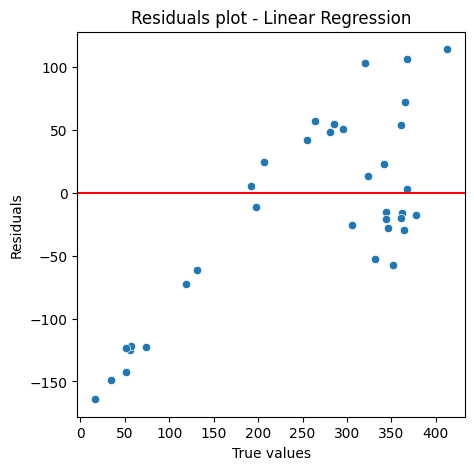

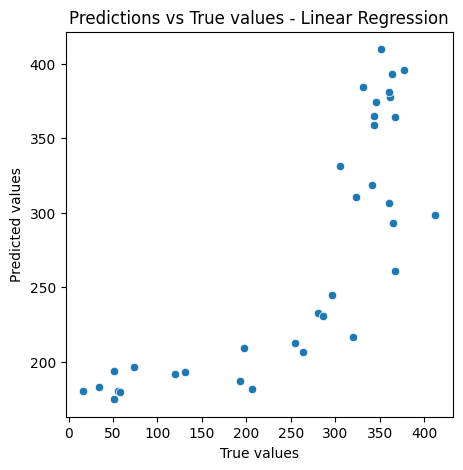

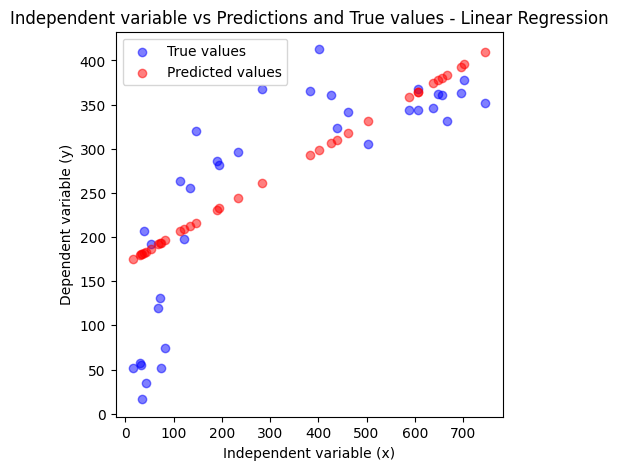


Model: KNN Regressor
Train R^2: 0.8526
Test R^2: 0.8478
MSE: 2295.2576


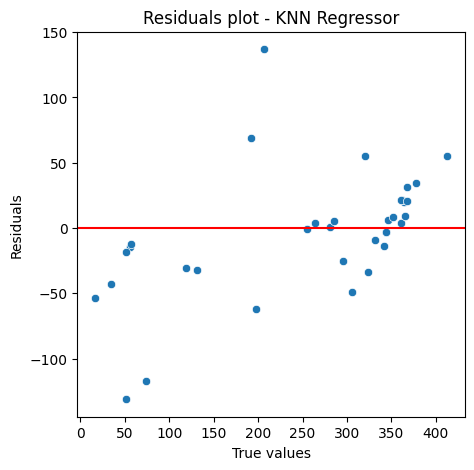

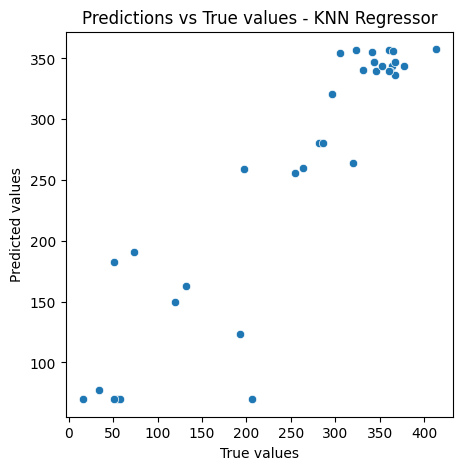

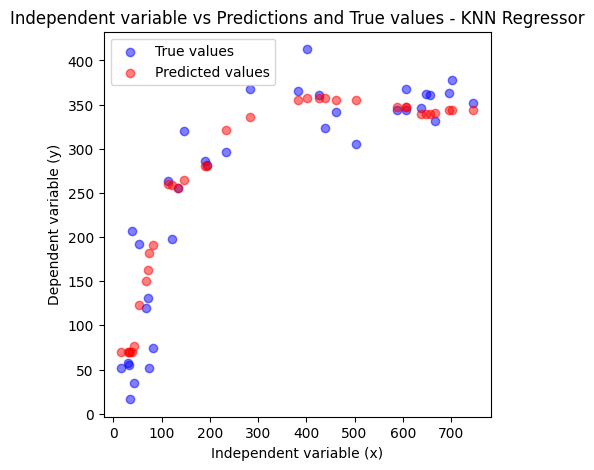


Model: Random Forest Regressor
Train R^2: 0.8861
Test R^2: 0.8313
MSE: 2543.5866


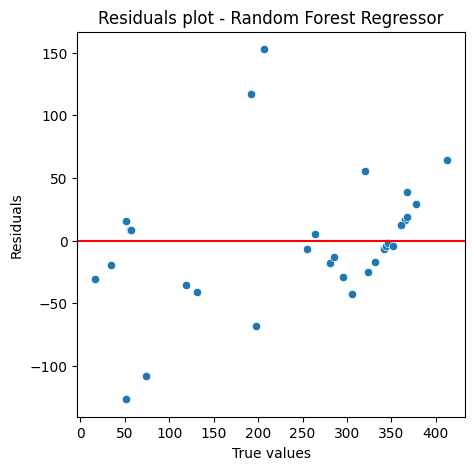

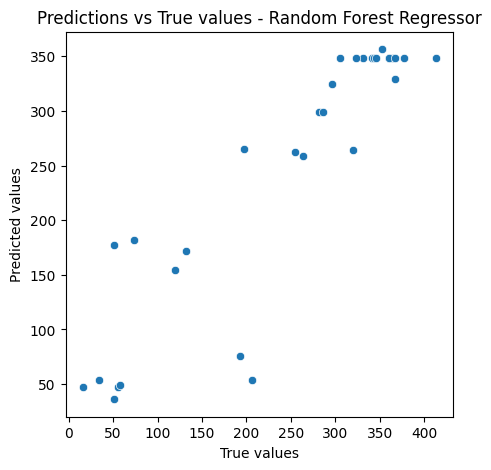

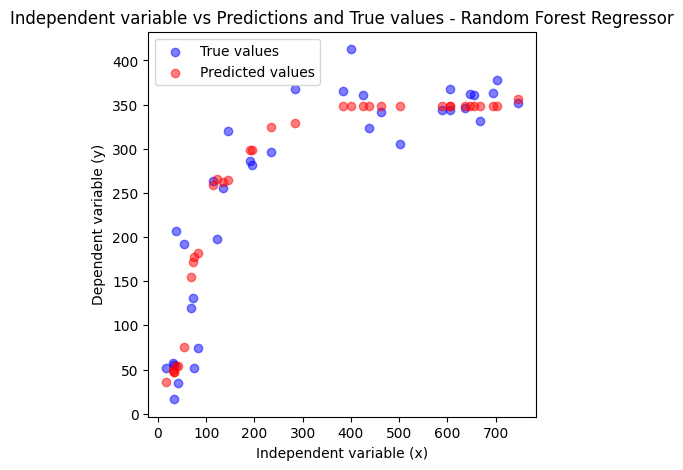


Model: XGBoost Regressor
Train R^2: 0.7870
Test R^2: 0.7425
MSE: 3882.1178


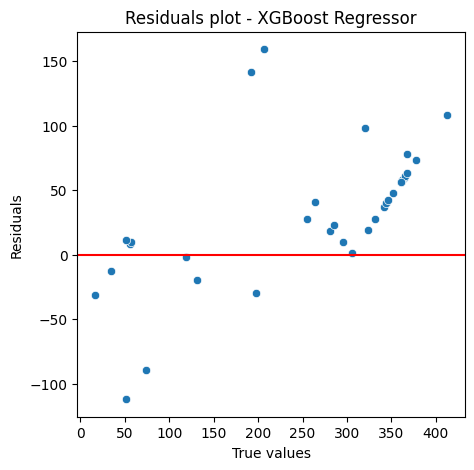

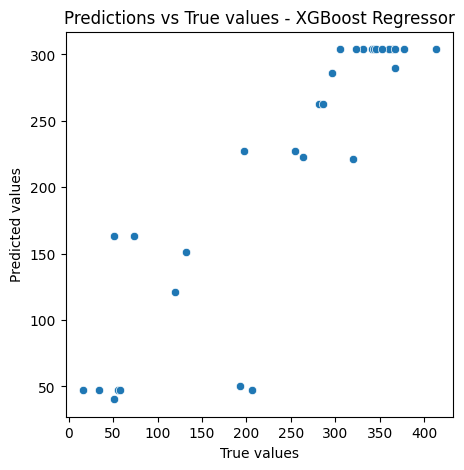

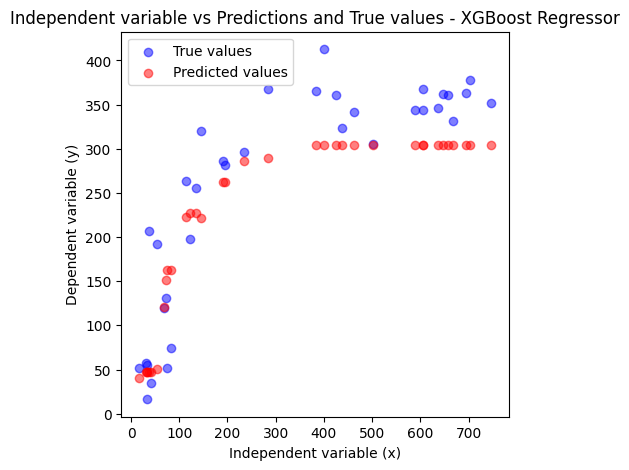

In [18]:
features = ['x']
target = 'y'

for i, df in enumerate(dataframes):
    print(f"Dataset {i + 1}:")

    # Separar características (X) y etiquetas (y)
    X = df[features]
    y = df[target]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = split_data(X, y)

    for model, model_name in zip(models, model_names):
        print(f"\nModel: {model_name}")

        # Entrenar y evaluar el modelo
        trained_model = model(X_train, y_train)
        train_r2, test_r2, mse = evaluate_regression_model(trained_model, X_train, y_train, X_test, y_test)

        # Imprimir resultados
        print(f"Train R^2: {train_r2:.4f}")
        print(f"Test R^2: {test_r2:.4f}")
        print(f"MSE: {mse:.4f}")

        y_pred = trained_model.predict(X_test)
        plot_residuals(y_test, y_pred, model_name)
        plot_predictions_vs_true(y_test, y_pred, model_name)
        plot_feature_vs_predictions_and_true(X_test, y_test, y_pred, model_name)


    print("\n" + "="*50 + "\n")